# Part 1 Markov Chain
## Sec 1 Markov Chain Concepts
### Markov Property
A stochastic process satisfies the **Markov property** if:
$$
P(X_{t+1} = x \mid X_0, X_1, \ldots, X_t) = P(X_{t+1} = x \mid X_t).
$$

### Homogeneous Markov Chains
A Markov chain is **homogeneous** if:
$$
P(X_{t+1} = x \mid X_t) = P(X_{s+1} = x \mid X_s), \quad \text{for all } t, s \in \mathbb{N}.
$$

### Lemma 7.7
Let $\{X_n, n \in \mathbb{N}\}$ be a homogeneous Markov chain. Let the state space $X = \{s_1, \ldots, s_N\}$ be enumerated and let $\mu_0$ be the PMF of $X_0$. Then the PMF $\mu_n$ for $X_n$ is given by:
$$
\mu_n = \mu_0 P^n.
$$

### Communication Between States
Let $X_t$ be a homogeneous Markov chain on state space $X = \{s_1, \ldots, s_N\}$. We say that $s_i \to s_j$ (communicates) if there exists a $t \in \mathbb{N}$ such that:
$$
P(X_t = s_j \mid X_0 = s_i) > 0.
$$
We say that $s_i$ and $s_j$ **intercommunicate** if $s_i \to s_j$ and $s_j \to s_i$. This is denoted as:
$$
s_i \leftrightarrow s_j.
$$

### Irreducibility
A homogeneous Markov chain $\{X_t\}_{t \in \mathbb{Z}_+}$ on state space $X = \{s_1, s_2, \ldots, s_k\}$ is said to be **irreducible** if:
$$
s_i \leftrightarrow s_j \quad \text{for each } (s_i, s_j) \in X^2.
$$
Otherwise, the chain is said to be **reducible**.

### Definition 7.21 (Return Times and Period)
Let:
$$
T(x) := \{t \in \mathbb{N} : P^t(x, x) > 0\}
$$
be the set of possible return times to the starting state $x$. The **period** of state $x$ is defined as:
$$
\text{gcd}(T(x)),
$$
the greatest common divisor of $T(x)$. If $\text{gcd}(T(x)) = 1$, the state $x$ is said to be **aperiodic**.

### Definition 7.24 (Stationary Distribution)
Let $\{X_t\}_{t \in \mathbb{Z}_+}$ be a Markov chain with state space $X = \{s_1, s_2, \ldots, s_k\}$ and transition matrix $P = (P(x, y))_{(x, y) \in X^2}$. A row vector:
$$
\pi = (\pi(s_1), \pi(s_2), \ldots, \pi(s_k)) \in \mathbb{R}^{1 \times k}
$$
is said to be a **stationary distribution** for the Markov chain if it satisfies the following conditions:
1. **Probability distribution**:
$$
\pi(x) \geq 0 \quad \text{for each } x \in X \quad \text{and} \quad \sum_{x \in X} \pi(x) = 1.
$$
2. **Fixed point**:
$$
\pi P = \pi, \quad \text{i.e.,} \quad \sum_{x \in X} \pi(x) P(x, y) = \pi(y), \quad \text{for each } y \in X.
$$

### Definition 7.26 (Reversible)
A probability distribution $\pi$ on $X = \{s_1, s_2, \ldots, s_k\}$ is said to be a **reversible distribution** for a Markov chain $\{X_t\}_{t \in \mathbb{Z}}$ on $X$ with transition matrix $P$ if for every pair of states $(x, y) \in X^2$:
$$
\pi(x) P(x, y) = \pi(y) P(y, x).
$$


### 方法1

In [4]:
import numpy as np
import networkx as nx

# 给定转移矩阵 P
P = np.array([[0.5, 0.5, 0.0],
              [0.2, 0.3, 0.5],
              [0.0, 1.0, 0.0]])

# 1. 构建有向图
G = nx.DiGraph(P)

# 2. 检查不可约性
is_irreducible = nx.is_strongly_connected(G)
print("Is the Markov chain irreducible?", is_irreducible)


# 3. 计算状态的周期
# 计算状态 x 的返回时间集 T(x)
def get_return_times(P, x):
    n = len(P)
    times = []
    for t in range(1, n+1):
        if np.linalg.matrix_power(P, t)[x, x] > 0:
            times.append(t)
    return times

# 计算状态的周期
periods = {}
for x in range(len(P)):
    T_x = get_return_times(P, x)
    period = reduce(gcd, T_x)
    periods[x] = period

# 输出结果
for state, period in periods.items():
    print(f"State {state} has period: {period}")
    if period == 1:
        print(f"State {state} is aperiodic")
    else:
        print(f"State {state} is not aperiodic")
print('\n')


# 4. 平稳分布 (stationary distribution)
from scipy.linalg import eig #zc已修复
w, v = eig(P, left=True, right=False)
stationary = np.real(v[:, np.isclose(w, 1)])
stationary = stationary / stationary.sum()
print("Stationary distribution:", stationary.ravel())


# 我的例子：
import numpy as np
# 定义转移矩阵
# 行表示初始状态/当前状态，列表示“下一步状态”
M = np.array([
    [0.7, 0.5, 0.6],
    [0.2, 0.3, 0.0],
    [0.1, 0.2, 0.4]
])
# 求解稳态分布
# M.T 是矩阵的转置，因为我们要求的是 M.T @ pi = pi
eigvals, eigvecs = np.linalg.eig(M.T)
steady_state = eigvecs[:, np.isclose(eigvals, 1)]  # 取特征值为 1 的特征向量
steady_state = steady_state / np.sum(steady_state)  # 归一化
print("稳态分布:", steady_state.real.flatten())


# 5. 检查是否为可逆马尔可夫链（Reversible Markov Chain）
# 可逆性的条件是：π(i) * P(i, j) = π(j) * P(j, i) 对于所有 i, j 成立
# 我们需要平稳分布 π 和转移矩阵 P 来验证这一点

# 计算平稳分布 π
stationary = stationary.ravel()  # 将平稳分布从二维转换为一维
is_reversible = True  # 初始假设是可逆的

# 遍历所有状态对 (i, j) 
for i in range(len(P)):
    for j in range(len(P)):
        if not np.isclose(stationary[i] * P[i, j], stationary[j] * P[j, i]):
            is_reversible = False
            break
    if not is_reversible:
        break

print("Is the Markov chain reversible?", is_reversible)



Is the Markov chain irreducible? True
稳态分布: [0.33333333 0.33333333 0.33333333]


NameError: name 'stationary' is not defined

In [ ]:
#转移矩阵检查

Ps=[P_A,P_B,P_C,P_D]
# 验证转移矩阵的合法性
def is_valid_transition_matrix(P):
    # 1. 检查是否为方阵
    if P.shape[0] != P.shape[1]:
        return False, "The matrix is not square."

    # 2. 检查是否所有元素为非负数
    if not np.all(P >= 0):
        return False, "The matrix contains negative elements."

    # 3. 检查每行是否归一化为 1
    if not np.allclose(np.sum(P, axis=1), 1):
        return False, "The rows do not sum to 1."

    return True, "The matrix is a valid transition matrix."

# 验证转移矩阵
is_vlid_list=[]
for i, p in enumerate(Ps):  # 使用 enumerate 获取索引 i 和矩阵 p
    is_valid, message = is_valid_transition_matrix(p)
    is_vlid_list.append(is_valid)
    
    # 输出验证结果
    print(f"Markov chain and Digraph have been successfully constructed.")
    print(f"The size of transition matrix P_{i} is: {p.shape}")
    print(f"Whether it is a qualified transition matrix: {message}")


# 如果转移矩阵有效，构建有向图
G_list=[]
for i, p in enumerate(Ps):
    if is_vlid_list[i]:
        # 1. 构建有向图
        G = nx.DiGraph()
        
        # 添加边和权重
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if p[i, j] > 0:  # 仅添加非零权重的边
                    G.add_edge(i, j, weight=p[i, j])
        
        # 打印构建结果
        print("The directed graph (Digraph) has been successfully constructed.")
        print("Number of nodes:", G.number_of_nodes())
        print("Number of edges:", G.number_of_edges())
    
        # 可视化或分析
        print("Graph edges with weights:")
        for u, v, data in G.edges(data=True):
            print(f"Edge from {u} to {v}, weight = {data['weight']}")
        G_list.append(G)
    else:
        print("The transition matrix is not valid. Please check your input.")
        G_list.append(None)


### 四个常见题的方法

## 问题描述

#### 1.在 $t$ 步后处于某一状态的概率
已知马尔可夫链在时间 $t_0$ 处于状态 $s_i$，计算在时间 $t_0 + t$ 处于状态 $s_j$ 的概率。




In [8]:
import numpy as np

def probability_at_time(P, initial_state, target_state, steps):
    """
    计算从初始状态 `initial_state` 出发，在经过 `steps` 次转移后，
    到达目标状态 `target_state` 的概率。
    
    参数:
    - P (ndarray): 马尔可夫链的转移矩阵。
    - initial_state (int): 初始状态的索引（从0开始）。
    - target_state (int): 目标状态的索引（从0开始）。
    - steps (int): 马尔可夫链的步数。
    
    返回:
    - float: 在 `steps` 步后到达目标状态的概率。
    """
    # 计算 P^steps
    P_steps = np.linalg.matrix_power(P, steps)
    # 返回目标状态的概率
    # 从结果矩阵 P^t中取出初始状态到目标状态的概率 P^t[initial_state,target_state]
    return P_steps[initial_state-1, target_state-1]

#### 2.首次到达某状态的期望时间（首达时间）
已知马尔可夫链在时间 $t_0$ 处于状态 $s_i$，计算首次进入状态 $s_j$ 的期望时间。

If we let $h_i,i \in \{1, \dots, j-1, j+1, \dots, n\}$ denote that the expected time to get state j for the first time when we are now in state i. For a specific $ j $: we can easily conclude that:
$$
h_i = \sum_k P_{ik} (1 + h_k \cdot \mathbb{1}_{(k>j)}), \quad i \in \{1, \dots, j-1, j+1, \dots, n\}
$$

this means if we want to be in j-th state, we have n possible ways with specific posibbilty from transition matrix, which either takes $1+h_k$ steps or directly arrive in this (1) step. We want to get the specific number of each $h_i$ by linear algebra.

We denote
$$
\vec{h} = (h_1 \, \cdots \, h_{j-1} \, h_{j+1} \, \cdots \, h_n)^T
$$
because $h_j$ will always be 0.   

We denote
$$
P^{-j} = \begin{pmatrix} & \\ \cdots \\ & \end{pmatrix}_{n-1 \times n-1}
$$
as a deduced trsnsition matrix where the j-th row and j-th column are deleted.

We also denote
$$
P_{\text{row}} = \begin{pmatrix} \sum_k P_{ik} \\ \vdots \end{pmatrix}
$$
as a column vector whose elements equal to the sum of each row of P.
Thus we have
$$
(P^{-j} - I_{n-1}) \vec{h} = P_{\text{row}}
$$
and we can get $h$.

In [11]:
import numpy as np

def calculate_first_hit_time_expectation(P, target_state):
    """
    计算从每个状态到达目标状态的期望时间。
    
    参数:
    - P: 转移矩阵 (numpy 数组)，表示每个状态之间的转移概率。
    - target_state: 目标状态的索引。
    
    返回:
    - h: 期望时间向量 (numpy 数组)，其中 h[i] 表示从状态 i 到目标状态的期望时间。
    """
    n = P.shape[0]  # 状态空间的大小
    
    # 删除目标状态对应的行和列
    P_minus = np.delete(P, target_state-1, axis=0)  # 删除第 target_state 行
    P_minus = np.delete(P_minus, target_state-1, axis=1)  # 删除第 target_state 列
    
    # 计算 b 向量
    # 这里计算的是公式中的向量P_row，表示每个状态的转移概率和（排除了目标状态）
    b = np.sum(P, axis=1)  # 每一行的元素加总
    b = -b  # 取负值

    b = np.delete(b, target_state-1)
    
    # 构造线性方程组，计算期望时间向量 h
    I = np.eye(n-1)  # (n-1)维单位矩阵
    h = np.linalg.solve(P_minus - I, b)  # 解方程 (P_minus - I) * h = b

    # 插入目标状态的期望时间为 0
    h_full = np.insert(h, target_state-1, 0)
    
    
    return h_full

#### 3..在 $t$ 步后【首次】进入某一状态的概率
这实际上可以分解为：
1. 计算从初始状态到目标状态的 首达时间。
2. 在首达时间条件下，计算首次进入目标状态的概率。

In [15]:
def first_hit_probability_at_t(P, initial_state, target_state, t):
    """
    计算：从 1-based 索引的状态 `initial_state` 出发，
         在第 t 步【首次】到达状态 `target_state` (1-based) 的概率。

    使用“首次到达时间”递推 (First Step Analysis)。
    
    参数：
    - P: 转移矩阵 (n x n)，(Python内部 0-based)。
    - initial_state: 初始状态 (1-based 索引)。
    - target_state:  目标状态 (1-based 索引)。
    - t: 第 t 步 (int)。

    返回：
    - float: P(T = t)，即第 t 步首次到达的概率。
    """
    n = P.shape[0]
    if t < 1:
        return 0.0

    # 转成 0-based
    init_idx = initial_state - 1
    targ_idx = target_state - 1

    # 如果初始态就是目标态，则第0步就“到达”了
    if init_idx == targ_idx:
        # 通常定义“首次到达”第0步概率 = 1.0, 所以 t>=1 时就不会再是“首次”
        return 1.0 if t == 0 else 0.0

    # f[step, i] = 从 i 出发，第 step 步首次到达 targ_idx 的概率
    # 注意 i, targ_idx 都是 0-based
    f = np.zeros((t+1, n))

    # 初始化: step=1 的情况, f[1, i] = P(i->targ_idx)，对 i != targ_idx
    for i in range(n):
        if i != targ_idx:
            f[1, i] = P[i, targ_idx]

    # 递推: f[step+1, i] = sum_{j != targ_idx} P(i->j)*f[step,j]
    for step in range(1, t):
        for i in range(n):
            if i != targ_idx:
                f[step+1, i] = 0.0
                for j in range(n):
                    if j != targ_idx:
                        f[step+1, i] += P[i, j] * f[step, j]

    # 返回：从 init_idx 出发，第 t 步首次到达 targ_idx
    return f[t, init_idx]


def first_hit_probability(P, initial_state, target_state, T):
    """
    返回一个列表 [P(T=1), P(T=2), ..., P(T=T)] (1-based 索引)，
    表示从 `initial_state` (1-based) 出发，到 `target_state` (1-based)，
    在 第1步/第2步/.../第T步 首次到达 的概率。
    """
    probs = []
    for t in range(1, T+1):
        val = first_hit_probability_at_t(P, initial_state, target_state, t)
        probs.append(val)
    return probs


In [ ]:
def probability_at_infinity(P, initial_state, target_state, T_max=100, tol=1e-12):
    """
    计算 P(T=∞) (1-based 索引)，即“从 `initial_state` 出发，永远不访问 `target_state` 的概率”。

    思路：
      - 累加 P(T=t) (t=1..T_max)，即到达事件的总概率(截断)。
      - 若总和 < 1-某阈值，则其余部分≈ P(T=∞).

    参数:
    - P: (n x n) 转移矩阵 (0-based 内部)
    - initial_state: 1-based
    - target_state: 1-based
    - T_max: 累加到多少步为止 (可根据规模增大)
    - tol: 判定是否近乎 1

    返回:
    - float: 近似的 P(T=∞)
    """
    # 累加 "首次到达" 概率到 T_max 步
    p_list = first_hit_probability(P, initial_state, target_state, T_max)
    total_reach = np.sum(p_list)
    # 若 total_reach < 1, 剩下就是 T=∞ 的概率
    p_infinity = max(0.0, 1.0 - total_reach)

    # 如果 total_reach 已经大于 1-tol，则视为几乎必达
    # 这里就简单返回 p_infinity；可以按需求改
    return p_infinity

#### 4. 判断是否非周期性，求各个状态的周期

In [18]:
import numpy as np
from math import gcd
from numpy.linalg import matrix_power

def find_periods(P, max_steps=100, tol=1e-10):
    n = P.shape[0]
    periods = []
    
    for i in range(n):
        return_times = []
        for t in range(1, max_steps + 1):  # Test up to max_steps
            P_t = matrix_power(P, t)
            if P_t[i, i] > tol:  # Allow small tolerance for numerical errors
                return_times.append(t)
        
        if not return_times:  # If no return times found, state is transient
            periods.append(None)  # Mark as transient
            continue
        
        # Compute GCD of all return times
        state_period = return_times[0]
        for rt in return_times[1:]:
            state_period = gcd(state_period, rt)
        
        periods.append(state_period)
    
    return periods

#### 例子

In [20]:

P = np.array([
    [0.5, 0.5, 0.0],
    [0.5, 0, 0.5 ],
    [0.5, 0, 0.5 ]
])

# 1. 从状态1出发，经过3步到达状态2的概率
prob = probability_at_time(P, initial_state=1, target_state=2, steps=3)
print(f"概率：{prob}")

# 2. 从状态1(h_index=0)出发，首次到达状态3的期望时间/步数
efpt = calculate_first_hit_time_expectation(P, target_state=3)
print(f"首达时间期望值：{efpt}")

# 3. 从状态1出发，经过3步【首次】进入状态2的概率
result = probability_first_hit_at_time(P, initial_state=1, target_state=2, t=3)
print(f"首次到达目标状态的概率: {result}")

# 4. 是否非周期性，各个state的周期
P_periods = find_periods(P, max_steps=100)# Increase max_steps if needed
is_aperiodic = all(p == 1 for p in P_periods if p is not None)
print("Periods for each state:", P_periods)
print("Is the Markov chain aperiodic?", is_aperiodic)


概率：0.25
首达时间期望值：[6. 4. 0.]
首次到达目标状态的概率: 0.0703125
Periods for each state: [1, 1, 1]
Is the Markov chain aperiodic? True


### 方法二

In [ ]:
from markovchain import MarkovChain
import numpy as np

# 定义转移矩阵
P = np.array([[0.5, 0.5, 0.0],
              [0.2, 0.3, 0.5],
              [0.0, 1.0, 0.0]])

# 构建马尔可夫链
mc = MarkovChain(P)

# 1. 检查不可约性
print("Is irreducible:", mc.is_irreducible())

# 2. 计算平稳分布
print("Stationary distribution:", mc.stationary_distribution())

# 3. 检查周期性
print("Periodicity:", mc.periodicity())

# 4. 检查可逆性
print("Is reversible:", mc.is_reversible())

# 随机数生成

## 生成均匀分布

### Definition 6.4

A **congruential generator** with parameters $(a, b, M)$ on $\{0, 1, \dots, M - 1\}$ is defined by the function:  
$D(x) = (ax + b) \mod M$

### Theorem 6.11 (Hull–Dobell Theorem)

这个定理给出了同余生成器是 周期性的 条件：The congruential generator $(a, b, M)$ has period $M$ if and only if:

1. $\gcd(b, M) = 1$, b和M的最大公约数是1，即b和M互质。
2. $p$ divides $a - 1$ for every prime $p$ that divides $M$, 对于模数M，把它分解成若干质因数，每个质因数p 必须能整除a−1。
3. $4$ divides $a - 1$ if $4$ divides $M$. 如果M是4的倍数，那么a-1也必须是4的倍数。

这些条件确保了生成的序列能够覆盖整个范围[0,1,...,M-1]，并且不让生成器在二进制层面避免陷入某些固定模式（如卡在某些数值循环）


In [32]:
import math
from sympy import primefactors
def uniformgenerator(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes. 就是(ax+b)modM里的x。
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
#     M = 2**31 - 1  #模数(Mersenne prime)
#     a = 48271      #乘数(Multiplier)
#     b = 0          #增量(Increment)
    
    M = 16  #模数(Mersenne prime)
    a = 5   #乘数(Multiplier)
    b = 3   #增量(Increment)
    
    raw_numbers = []
    current = seed
    seen = {} #在生成过程中检查是否达到了周期性（即是否重新回到了种子值）。这可以帮助验证生成器的实现是否正确。
    
    for i in range(size):
        current = (a * current + b) % M
        raw_numbers.append(current)
        
        # Check if this number has been seen before (cycle detection)
        if current in seen:
            cycle_start = seen[current]
            print(f"Cycle detected! Period starts at index {cycle_start} and repeats at index {i}. Period length: {i - cycle_start}")
            break
        seen[current] = i  # Record the position of this number

    uniform_numbers=[x / M for x in raw_numbers] # Normalize to [0, 1)
    
    return uniform_numbers

#### 例子

In [33]:
print("Testing uniformgenerator with periodicity check...\n")

# Test with small parameters to observe periodicity
size = 20
seed = 0  # Starting value
generated_numbers = uniformgenerator(size=size, seed=seed)

print("\nGenerated numbers (normalized to [0, 1)):")
print(generated_numbers)

Testing uniformgenerator with periodicity check...

Cycle detected! Period starts at index 0 and repeats at index 16. Period length: 16

Generated numbers (normalized to [0, 1)):
[0.1875, 0.125, 0.8125, 0.25, 0.4375, 0.375, 0.0625, 0.5, 0.6875, 0.625, 0.3125, 0.75, 0.9375, 0.875, 0.5625, 0.0, 0.1875]


## A-R法生成随机数

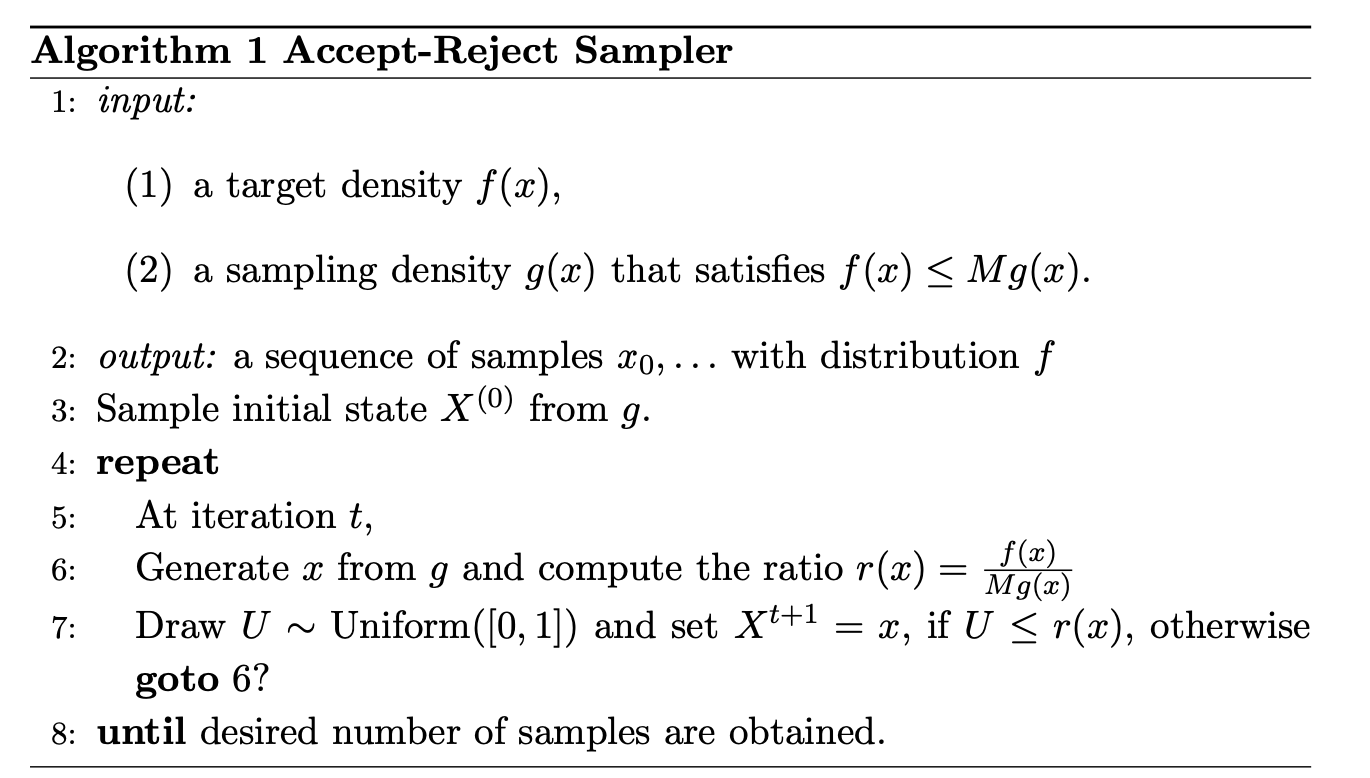

![image.png](rejectsampling.jpg)

In [36]:
import numpy as np
import time

def RN_generator(M,n_samples=1000):
    """
    Generate samples from the given distribution using rejection sampling.
    """
    def target_pdf(x): # 目标分布f(x)
        """
        Target probability density function p(x).
        also can be writen in lamnda form
        """
        pass
        #return p(x)  # Given PDF for x domain

    def proposal_pdf(x): # 候选分布g(x)
        """
        Proposal distribution q(x): Uniform distribution.
        we usually use Uniform distribution in given domain
        or you can choose some beta-distribution to make it easier to be accepted
        (actually we choose the distribution with thick tail)
        """
        return 1  # Uniform distribution on x-domain

    # Rejection sampling parameters
    M = M  # Scaling constant, chosen based on the maximum ratio p(x) / q(x),the more M closer to the ratio,the easier to be accepted
    samples = []
    count = 0  # Count total iterations for efficiency check

    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)  # x from 候选分布g(x)~ U[0, 1]
        u = np.random.uniform(0, M * proposal_pdf(x))  # Uniform random for acceptance

        if u <= target_pdf(x):  # Accept or reject
            samples.append(x)
        count += 1

    print(f"Generated {n_samples} samples with {count} total iterations.")
    return np.array(samples)


#### 例子

Generated 1000 samples with 2049 total iterations.


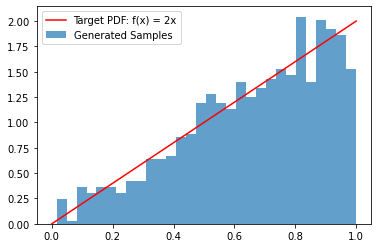

In [37]:
import numpy as np

def RN_generator(M, n_samples=1000):
    """
    Generate samples from the given distribution using rejection sampling.
    """
    def target_pdf(x):
        # Define target distribution: f(x) = 2x for x in [0, 1]
        return 2 * x if 0 <= x <= 1 else 0

    def proposal_pdf(x):
        # Proposal distribution: Uniform distribution
        return 1 if 0 <= x <= 1 else 0

    samples = []
    count = 0  # Total iterations for efficiency check

    while len(samples) < n_samples:
        # Generate a candidate sample from proposal distribution
        x = np.random.uniform(0, 1)
        # Generate a uniform random number for acceptance
        u = np.random.uniform(0, M * proposal_pdf(x))
        count += 1
        # Accept or reject the candidate
        if u <= target_pdf(x):
            samples.append(x)

    print(f"Generated {n_samples} samples with {count} total iterations.")
    return np.array(samples)

# Test the generator
M = 2  # Maximum ratio f(x) / g(x)
samples = RN_generator(M, n_samples=1000)

# Plot the results
import matplotlib.pyplot as plt
plt.hist(samples, bins=30, density=True, alpha=0.7, label="Generated Samples")
x = np.linspace(0, 1, 100)
plt.plot(x, [2 * xi for xi in x], label="Target PDF: f(x) = 2x", color="red")
plt.legend()
plt.show()


Generated 10000 samples with 40226 total iterations.


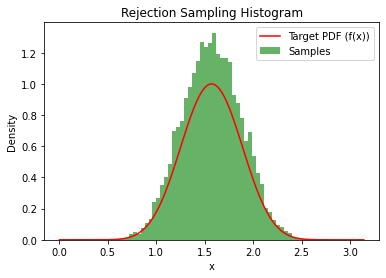

In [40]:
# 例子2

import math
import numpy as np

def problem1_rejection(n_samples=1000):
    """
    Generate samples from the given distribution using rejection sampling.

    Parameters:
    n_samples: int, number of samples to generate

    Returns:
    numpy array of samples
    """
    # Define target PDF (f(x))
    # 目标分布sin(x)^10最大值为 1（在 x = π/2 时达到最大）
    def target_pdf(x):
        return (math.sin(x) ** 10) if 0 <= x <= math.pi else 0

    # Define proposal PDF (g(x)) as a uniform distribution over [0, π]
    # 而候选分布 g(x) 必须覆盖目标分布的整个定义域 [0, π], 而不是[0, 1]。
    def proposal_pdf(x):
        return 1 if 0 <= x <= math.pi else 0

    # Define M (scaling constant)
    M = 1  # This works because f(x): sin(x)^10 ≤ Mg(x): 1 for all x in [0, π]

    samples = []
    count = 0  # For efficiency check

    while len(samples) < n_samples:
        # Generate candidate sample x from proposal distribution
        x = np.random.uniform(0, math.pi)  # Uniformly sample x in [0, π]

        # Generate a uniform random number for acceptance
        u = np.random.uniform(0, M * proposal_pdf(x))

        # Accept or reject the candidate
        if u <= target_pdf(x):
            samples.append(x)
        count += 1  # Count the total iterations

    print(f"Generated {n_samples} samples with {count} total iterations.")
    return np.array(samples)



# Part 2

import matplotlib.pyplot as plt

# Generate 10,000 samples using rejection sampling
problem1_samples = problem1_rejection(n_samples=10000)

# Plot histogram of the samples
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='g', label="Samples")

# Overlay the target PDF for comparison
x = np.linspace(0, math.pi, 500)
y = [(math.sin(val) ** 10) for val in x]
plt.plot(x, y, 'r-', label="Target PDF (f(x))")

plt.title("Rejection Sampling Histogram")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

怎样计算M

In [6]:
import numpy as np

def find_rejection_constant(target_pdf, proposal_pdf, a, b, num_points=1000):
    """
    在区间 [a, b] 上，用网格搜索的方式找到
        M 约等于 max_{x in [a,b]} [ target_pdf(x) / proposal_pdf(x) ].
    适用于拒绝采样需要的 f(x) <= M*g(x).
    
    参数:
    --------
    target_pdf: 目标分布 PDF, e.g. lambda x: ...
    proposal_pdf: 提案分布 PDF, e.g. lambda x: ...
    a, b: float
        区间 [a, b]，假设目标分布支持主要落在这段里。
    num_points: int
        网格点数量，越大越精细，但计算也会越多。
    
    返回:
    --------
    float
        估计出的 M 值。
    """
    xs = np.linspace(a, b, num_points)
    ratios = []
    for x in xs:
        f_val = target_pdf(x)
        g_val = proposal_pdf(x)
        if g_val <= 0:
            # 如果 g_val=0, 但 f_val>0 => 无法覆盖 => M 应该无穷大
            # 也可能表示 x 不在提案分布的支持，或数值误差
            # 这里示例里设一个极大值
            if f_val > 0:
                return np.inf
            else:
                ratios.append(0)
        else:
            ratios.append(f_val / g_val)
    return max(ratios)

# 测试：
# 定义你的 target_pdf, proposal_pdf
def target_pdf_example(x):
    if 0 < x < 1/20:
        return 20*np.exp(20 - 1/x)*(1 + 1/x)
    else:
        return 0.0

def proposal_pdf_example(x):
    lam = 20.0
    if x >= 0:
        return lam * np.exp(-lam*x)
    else:
        return 0.0

M = find_rejection_constant(target_pdf_example, proposal_pdf_example, 0.001, 1/20, 1000)
print("Estimated M:", M)

Estimated M: 55.971202630989595


## 样本和置信区间
## 蒙特卡洛方法
用大量的抽样样本近似估计某个值

In [35]:
# 例子1： 蒙特卡洛方法估计 π 值

import numpy as np

def monte_carlo_pi(num_samples=10000):
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)
    inside_circle = (x**2 + y**2) <= 1
    pi_estimate = 4 * np.sum(inside_circle) / num_samples
    return pi_estimate

print(f"Estimated π: {monte_carlo_pi()}")


Estimated π: 3.1268


In [41]:
# 例子2：蒙特卡洛方法计算 E(Y), Y = (X - π/2)^2

samples = np.array(problem1_samples)

# 定义 Y 的公式
Y = (samples - math.pi / 2) ** 2

# 计算期望 E[Y]
problem1_expectation = np.mean(Y)

print(f"E[Y]: {problem1_expectation}")


E[Y]: 0.09239527192826641


Estimated C: 1.3021615297680889


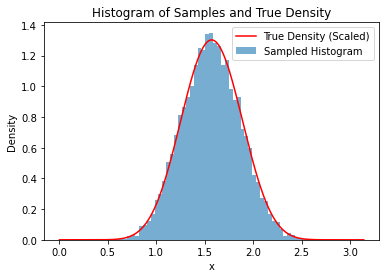

In [43]:
# 例子3： 蒙特卡洛积分估算归一化系数 24年8月考试题 1(5)

import numpy as np
import matplotlib.pyplot as plt
import math

# 定义目标概率密度函数 f(x)
def target_pdf(x):
    return (np.sin(x)) ** 10 if 0 <= x <= math.pi else 0

# 蒙特卡洛积分估计归一化系数 C
def estimate_C(samples=100000):
    x_samples = np.random.uniform(0, math.pi, samples)
    integral_estimate = np.mean([(np.sin(x)) ** 10 for x in x_samples]) * math.pi
    C = 1 / integral_estimate
    return C

# 生成样本并画图
def plot_samples_and_density(n_samples=10000):
    # 估计 C
    C = estimate_C()
    print(f"Estimated C: {C}")

    # 生成样本
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(0, math.pi)
        u = np.random.uniform(0, C * 1)  # 候选分布 g(x) = 1
        if u <= target_pdf(x):
            samples.append(x)

    # 绘制直方图
    plt.hist(samples, bins=50, density=True, alpha=0.6, label="Sampled Histogram")

    # 绘制真实分布
    x_vals = np.linspace(0, math.pi, 1000)
    y_vals = [C * target_pdf(x) for x in x_vals]
    plt.plot(x_vals, y_vals, label="True Density (Scaled)", color="red")

    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Histogram of Samples and True Density")
    plt.legend()
    plt.show()

# 执行函数
plot_samples_and_density()


## 霍夫定不等式
给出了期望估计的误差范围上下界限（生成置信区间）

In [42]:
# 例子1：从之前的代码生成的 Y 样本（长度为 n）来计算一个 95% 的置信区间（confidence interval）

import numpy as np
import math

# 假设我们已经有 n 个样本的 Y 值
n = 10000  # 样本数量
Y_mean = problem1_expectation

# Y 的范围 [a, b] 是随机变量Y本身的最小值与最大值
a = 0  # 最小值发生在 X = π/2
b = (math.pi/2)**2  # 最大值发生在 X = 0 或 X = π

# Hoeffding's inequality 参数
delta = 0.05  # 1 - 置信水平
epsilon = math.sqrt(((b - a)**2 * math.log(2 / delta)) / (2 * n))

# 计算置信区间
problem1_interval = (Y_mean - epsilon, Y_mean + epsilon)

print(f"95% confidence interval for E[Y]: {problem1_interval}")


95% confidence interval for E[Y]: (1.5400065247342527, 1.6070261482186516)


In [44]:
# 例子2：适用于对于 0–1 随机变量（或者更广泛地说，只要取值落在 [0,1] 区间），它确实可以给一个“分布无关”的置信区间。

import numpy as np

def hoeffding_confidence_interval(value, n, confidence_level=0.95):
    """
    使用 Hoeffding 不等式计算置信区间。
    
    参数:
    - value: 精确率或召回率的经验值 (precision/recall)。
    - n: 样本数量。
    - confidence_level: 置信水平 (默认为 95%)。

    返回:
    - (lower_bound, upper_bound): 置信区间。
    """
    delta = 1 - confidence_level  # 映射置信水平到 delta
    epsilon = np.sqrt(np.log(2 / delta) / (2 * n))  # Hoeffding 界限
    lower_bound = max(0, value - epsilon)  # 确保下界不小于 0
    upper_bound = min(1, value + epsilon)  # 确保上界不大于 1
    return lower_bound, upper_bound

# 示例数据
n_samples = 100  # 样本数量
precision = 0.85  # 精确率
recall = 0.80  # 召回率

# 计算置信区间
precision_ci = hoeffding_confidence_interval(precision, n_samples)
recall_ci = hoeffding_confidence_interval(recall, n_samples)

print(f"精确率的 95% 置信区间: {precision_ci}")
print(f"召回率的 95% 置信区间: {recall_ci}")

精确率的 95% 置信区间: (0.714189848425938, 0.9858101515740619)
召回率的 95% 置信区间: (0.6641898484259381, 0.935810151574062)


## 回归
回归问题一般出现的形式是给出形如f_{Y|X}的条件分布，然后要求我们根据极大似然、交叉熵之类的原则完善损失函数、补充训练过程； Pattern recognization 问题同理

In [ ]:
# 常用包

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_abosolute_error
import pandas as pd
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

``` python
# 常见的坑：打乱 or 不打乱按顺序取；划分点向上取整还是向下; 模型的输入是dataFrame还是Numpy，类型转换...
# 训练集划分（朴素）
df=pd.read_csv('data/Corona_NLP_train.csv',encoding='latin')
df = df[df['Sentiment'] != 'Neutral']

df.reset_index(drop=True, inplace=True)

df['Y'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)


X = df['OriginalTweet'].values

Y = df['Y'].values



### 不打乱
#比例[0.6,0,15,0,25]不随机
n = len(X)
train_end = int(0.6 * n)
test_end = int(0.75 * n)-1

# 根据索引划分数据集
X_train = X[:train_end]
Y_train = Y[:train_end]
X_test = X[train_end:test_end]
Y_test= Y[train_end:test_end]
X_valid = X[test_end:]
Y_valid  =Y[test_end:]



### 打乱
n_samples = problem3_X.shape[0]


# 随机打乱数据的索引
indices = np.random.permutation(n_samples)

# 计算划分点
train_end = int(0.4 * n_samples)  # 训练集的结束位置（40%）
calib_end = int(0.6 * n_samples)  # 校准集的结束位置（60%）

# 使用切片根据划分点提取数据
train_indices = indices[:train_end]
calib_indices = indices[train_end:calib_end]
test_indices = indices[calib_end:]

# 划分特征和标签
problem3_X_train = problem3_X[train_indices]
problem3_X_calib = problem3_X[calib_indices]
problem3_X_test = problem3_X[test_indices]

problem3_Y_train = problem3_Y[train_indices]
problem3_Y_calib = problem3_Y[calib_indices]
problem3_Y_test = problem3_Y[test_indices]

print(problem3_X_train.shape,problem3_X_calib.shape,problem3_X_test.shape,problem3_Y_train.shape,problem3_Y_calib.shape,problem3_Y_test.shape)
```

``` python
# df转np
problem1_wind_direction = df['Vindriktning'].to_numpy()
problem1_wind_speed = df['Vindhastighet'].to_numpy()
```


In [ ]:
# 一个训练类的实例

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        
        logits = np.dot(X, coeffs[1:]) + coeffs[0]
        predictions = 1 / (1 + np.exp(-logits))  # 使用 sigmoid 函数得到概率
        # 计算负对数似然损失
        loss_value = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
        return loss_value

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration




``` python
# 模型评估 Model Evaluation

# 预测
Y_pred = model.predict(X_test)

# 计算精度（Precision）和召回率（Recall）
precision_0 = precision_score(Y_test, Y_pred, pos_label=0)
precision_1 = precision_score(Y_test, Y_pred, pos_label=1)
recall_0 = recall_score(Y_test, Y_pred, pos_label=0)
recall_1 = recall_score(Y_test, Y_pred, pos_label=1)

# 1. 分类报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
```

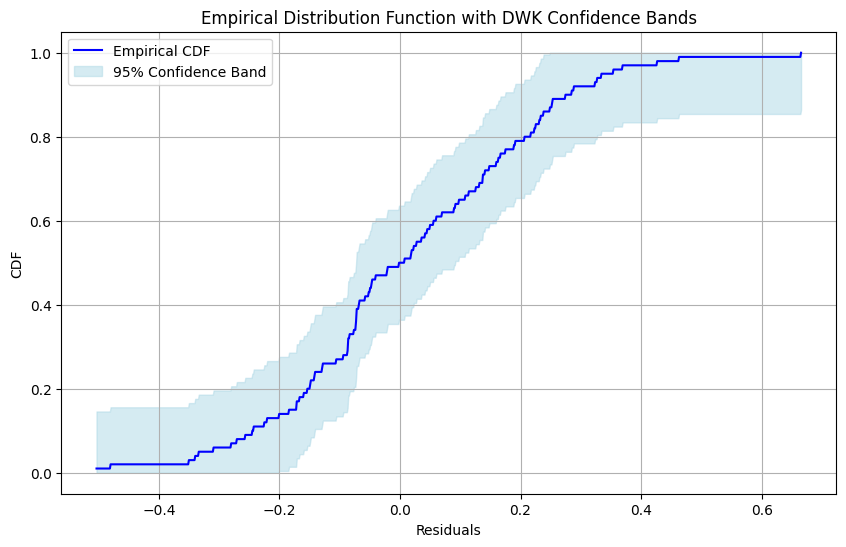

In [12]:
# 画图

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# 示例数据：真实值和预测值
y_true = np.random.normal(0, 1, 100)
y_pred = y_true + np.random.normal(0, 0.2, 100)

# 1. 计算残差
residuals = y_true - y_pred

# 2. 计算经验分布函数 (EDF)
ecdf = ECDF(residuals)
x = np.linspace(min(residuals), max(residuals), 1000)
y_ecdf = ecdf(x)

# 3. 计算 DWK 置信区间带
n = len(residuals)
epsilon = np.sqrt((1 / (2 * n)) * np.log(2 / 0.05))  # 95% 置信水平
upper_band = np.minimum(y_ecdf + epsilon, 1)
lower_band = np.maximum(y_ecdf - epsilon, 0)

# 4. 绘制残差分布和置信区间
plt.figure(figsize=(10, 6))

# 实证分布函数
plt.plot(x, y_ecdf, label="Empirical CDF", color="blue")

# 置信区间带
plt.fill_between(x, lower_band, upper_band, color="lightblue", alpha=0.5, label="95% Confidence Band")

# 图例和标签
plt.title("Empirical Distribution Function with DWK Confidence Bands")
plt.xlabel("Residuals")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()


``` python
# 一些其他Util 工具类

#todo：确认这个函数存在
import numpy as np
import matplotlib.pyplot as plt
from utils import plotEDF, makePDF  # 假设 utils 包中有这些函数

# 示例数据：真实值和预测值
y_true = np.random.normal(0, 1, 100)
y_pred = y_true + np.random.normal(0, 0.2, 100)

# 1. 计算残差
residuals = y_true - y_pred

# 2. 使用 utils 绘制实证分布函数 (EDF)
edf_x, edf_y = plotEDF(residuals)  # 返回 EDF 的 x 和 y 值

# 3. DWK 不等式计算置信区间带
n = len(residuals)
epsilon = np.sqrt((1 / (2 * n)) * np.log(2 / 0.05))  # 95% 置信水平
upper_band = np.minimum(edf_y + epsilon, 1)
lower_band = np.maximum(edf_y - epsilon, 0)

# 4. 使用 utils 生成概率密度函数 (PDF)
pdf_x, pdf_y = makePDF(residuals)

# 5. 绘图
plt.figure(figsize=(10, 6))

# 实证分布函数
plt.plot(edf_x, edf_y, label="Empirical CDF", color="blue")

# 置信区间带
plt.fill_between(edf_x, lower_band, upper_band, color="lightblue", alpha=0.5, label="95% Confidence Band")

# 概率密度函数
plt.plot(pdf_x, pdf_y, label="Fitted PDF", color="red", linestyle="--")

# 图例和标签
plt.title("Empirical Distribution Function with DWK Confidence Bands")
plt.xlabel("Residuals")
plt.ylabel("CDF / PDF")
plt.legend()
plt.grid()
plt.show()
```

### 校准
这里提到的校准是用校准器（本质是另一个模型）校准某个模型预测结果的过程。详细的说，校准分为三步。首先把数据集划分成三部分：训练、校准（calib)、测试。
其次，我们先在训练集上训练模型M1，然后用训练好的M1在校准集上预测产生一个结果y_M1_calib_pred，这时候我们有了校准集的实际结果和预测结果y_M1_calib_pred，我们利用这个关系训练模型M2(y_calib,这时候我们有了校准集的实际结果和预测结果y_M1_calib_pred),M2也叫校准器。最后我们在测试集上预测得到y_M1_test_pred,我们用校准器校准它得到最终预测结果。

### 一个例子
来源于Assign3 Problem 3

背景：我们假设已经把数据集分成三部分：*_X_train,*_X_calib,*_X_test
于是我们在训练集训练基准模型，利用其在校准集上的预测的标签真实值训练校准树模型，最后在测试集上利用校准模型修正集准模型的预测结果


``` python
problem3_ps = ProportionalSpam()
problem3_ps.fit(problem3_X_train, problem3_Y_train)


problem3_X_pred = problem3_ps.predict(problem3_X_calib).reshape(-1, 1)

problem3_calibrator = DecisionTreeRegressor()
problem3_calibrator.fit(problem3_X_pred, problem3_Y_calib)

test_pred_raw = problem3_ps.predict(problem3_X_test).reshape(-1, 1)
problem3_final_predictions = problem3_calibrator.predict(test_pred_raw)
```

### 关于拒绝采样的一些候选函数常用分布PDF和可视化

In [ ]:
# 1. 均匀分布 (目标分布在 [a,b] 上比较平坦)
def proposal_pdf_uniform(x, a=0.0, b=1.0):
    """
    均匀分布 U(a,b) 的概率密度函数。
    """
    if a <= x <= b:
        return 1.0 / (b - a)
    else:
        return 0.0


In [ ]:
# 2. 指数分布 (快速衰减)
#适用于(0,+∞) 上快速衰减的情况。
import numpy as np

def proposal_pdf_exponential(x, lam=1.0):
    """
    指数分布 Exp(lam) 的概率密度函数 (rate=lam).
    只在 x>=0 上有效.
    """
    if x >= 0:
        return lam * np.exp(-lam * x)
    else:
        return 0.0

def sample_from_proposal(lam=20.0):
    """
    从 Exp(lam) 产生一个候选样本
    """
    return np.random.exponential(scale=1.0/lam)

In [ ]:
# 正态分布
# 适用于“形状像钟、可能在整个实数轴上”的情况。
def proposal_pdf_normal(x, mu=0.0, sigma=1.0):
    """
    正态分布 N(mu, sigma^2) 的概率密度函数。
    """
    # 常数项
    coeff = 1.0 / (np.sqrt(2.0 * np.pi) * sigma)
    # 指数项
    exponent = -0.5 * ((x - mu) / sigma)**2
    return coeff * np.exp(exponent)


In [ ]:
# Beta分布
# 适用于(0,1) 上带有某种单峰、双峰或形状灵活的情况
# 其中 B(α,β) 是 Beta 函数，α,β>0。
import math
from math import gamma

def proposal_pdf_beta(x, alpha=2.0, beta=2.0):
    """
    Beta(alpha, beta) 分布的概率密度函数, x ∈ (0,1).
    """
    if x < 0 or x > 1:
        return 0.0
    # Beta函数 B(a,b) = gamma(a)*gamma(b)/gamma(a+b)
    B_ab = gamma(alpha)*gamma(beta) / gamma(alpha+beta)
    return (x**(alpha-1) * (1 - x)**(beta - 1)) / B_ab


In [ ]:
# 下面示范一个通用的函数 plot_distribution(f, start, end, num_points=1000)
# 它会在给定区间 [start, end] 上打一个线性网格，然后计算 f(x) 并用 matplotlib 画出曲线
import numpy as np
import matplotlib.pyplot as plt

def plot_distribution(f, start, end, num_points=1000, title='Distribution'):
    """
    在区间 [start, end] 上，打 num_points 个网格点，计算 f(x)，并用 matplotlib 画出曲线。
    这里 f(x) 是某个目标分布的 PDF (或其他函数)。
    """
    xs = np.linspace(start, end, num_points)
    fs = [f(x) for x in xs]
    
    plt.figure(figsize=(6,4))
    plt.plot(xs, fs, label='f(x)')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    #plt.yscale('log') #如果想看对数坐标（有时对快速衰减的分布更直观），可以在画图前调用
    plt.show()


## 补充一些数据预处理

In [ ]:
import pandas as pd

# 读取数据集（没有列名）
file_path = '/data/rainfallInChristchurch.csv'
data = pd.read_csv(file_path, header=None)

# 将第一列解析为日期格式
data[0] = pd.to_datetime(data[0], format='%Y%m%d')  # 假设日期格式为 YYYYMMDD

# 将第一列保存为 X（日期），第二列保存为 Y
X = data.iloc[:, [0]]  # 日期列
Y = data.iloc[:, [1]]  # 数值列

# 如果需要将日期设置为索引
data_with_index = data.set_index(0)

# 输出 X 和 Y 的前几行以确认
print("X (Dates):")
print(X.head())
print("Y:")
print(Y.head())
print("Data with Date as Index:")
print(data_with_index.head())


In [ ]:
import pandas as pd

# 读取文件
file_path = 'co2_mm_mlo.txt'
with open(file_path, 'r') as f:
    lines = f.readlines()

# 分离描述部分和数据部分
description_lines = []
data_lines = []
data_start = False
for line in lines:
    if line.strip().startswith('year') or line.strip().startswith('# year'):  # 假定数据部分从"year"开始
        data_start = True
    if data_start:
        data_lines.append(line)
    else:
        description_lines.append(line)

# 打印描述信息
description = ''.join(description_lines)
print("描述部分:")
print(description)

# 将数据部分转换为DataFrame
from io import StringIO

data = ''.join(data_lines)
df = pd.read_csv(StringIO(data), delim_whitespace=True, comment='#')
print("数据部分:")
print(df.head())

# 示例：计算年均CO2浓度
df['average'] = df['average'].replace(-99.99, None)  # 替换无效数据
annual_mean = df.groupby('year')['average'].mean()
print("年均CO2浓度:")
print(annual_mean)


## 常用分布的对数似然

In [ ]:
# 正态分布
def log_likelihood_normal(data, mu, sigma):
    n = len(data)
    log_sigma = -n * np.log(sigma)
    squared_error = -np.sum((data - mu) ** 2) / (2 * sigma ** 2)
    return log_sigma + squared_error


In [ ]:
#泊松分布
def log_likelihood_poisson(data, lam):
    log_likelihood = np.sum(data * np.log(lam) - lam)
    return log_likelihood


In [ ]:
# 二项分布
def log_likelihood_binomial(data, n_trials, p):
    log_likelihood = np.sum(data * np.log(p) + (n_trials - data) * np.log(1 - p))
    return log_likelihood


In [ ]:
# 逻辑回归
def log_likelihood_logistic(data, labels, theta):
    z = np.dot(data, theta)
    h_theta = 1 / (1 + np.exp(-z))
    log_likelihood = np.sum(labels * np.log(h_theta) + (1 - labels) * np.log(1 - h_theta))
    return log_likelihood


In [ ]:
# 指数分布
def log_likelihood_exponential(data, lam):
    log_likelihood = len(data) * np.log(lam) - lam * np.sum(data)
    return log_likelihood


In [ ]:
#gamma分布
def log_likelihood_gamma(data, alpha, beta):
    term1 = len(data) * alpha * np.log(beta)
    term2 = (alpha - 1) * np.sum(np.log(data))
    term3 = -beta * np.sum(data)
    log_likelihood = term1 + term2 + term3
    return log_likelihood


In [ ]:
# 示例数据
data = np.array([1.2, 2.3, 3.1, 4.0, 5.1])

# 正态分布
mu, sigma = 3.0, 1.5
print("Normal Log-Likelihood (no constant):", log_likelihood_normal(data, mu, sigma))

# 泊松分布
lam = 3.5
print("Poisson Log-Likelihood (no constant):", log_likelihood_poisson(data, lam))

# 二项分布
n_trials, p = 10, 0.6
print("Binomial Log-Likelihood (no constant):", log_likelihood_binomial(data.astype(int), n_trials, p))

# 逻辑回归
labels = np.array([1, 0, 1, 1, 0])
theta = np.array([0.5, -0.2, 0.1])
data_logistic = np.random.rand(len(labels), len(theta))
print("Logistic Log-Likelihood:", log_likelihood_logistic(data_logistic, labels, theta))

# 指数分布
lam = 2.0
print("Exponential Log-Likelihood:", log_likelihood_exponential(data, lam))

# 伽马分布
alpha, beta = 2.0, 1.0
print("Gamma Log-Likelihood (no constant):", log_likelihood_gamma(data, alpha, beta))
